In [2]:
#Ta-Chi Lin
#112356839
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import branca.colormap as cm
%matplotlib inline

In [3]:
US_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
US_data

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,6570,6577,6580,6589,6595,6606,6617,6619,6620,6644
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,20473,20487,20492,20505,20523,20519,20526,20541,20542,20551
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,2226,2226,2227,2227,2227,2228,2231,2232,2232,2238
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,2536,2536,2537,2542,2543,2544,2545,2546,2546,2549
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,6424,6426,6443,6444,6446,6455,6458,6459,6460,6462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,3562,3593,3593,3609,3618,3624,3624,3624,3632,3640
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,2119,2123,2125,2128,2134,2139,2139,2139,2134,2135
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,890,891,891,891,891,891,891,891,892,892


In [4]:
# We sum up the case numbers of each state together
US_data_2 = US_data.groupby(US_data['Province_State']).agg(sum)
US_data_2.head(5)

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,5796241491,57960,241491.0,2203.246784,-5809.578199,0,0,0,0,0,...,514391,514619,514980,515388,515866,516266,516615,516809,516918,517114
Alaska,2772236473,27720,236473.0,1868.733025,-4605.860811,0,0,0,0,0,...,62264,62265,62901,62901,63298,63501,63501,63501,64001,64081
American Samoa,16,16,60.0,-14.271000,-170.132000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,1428230216,14280,230216.0,505.138555,-1671.948482,0,0,0,0,1,...,839888,840492,841078,841811,842192,843132,843838,844302,844910,845480
Arkansas,6468550635,64680,550635.0,2618.391704,-6932.548370,0,0,0,0,0,...,329929,330008,330186,330398,330609,330753,330970,331054,331098,331261


In [5]:
# Clean the data
US_data_2.insert(loc = 0, column = 'Prov_abb', value = US_data_2.index.values)  # insert a new column to store state abbreviations
US_data_3 = US_data_2.reset_index(drop = True)  # to remove the current index. It was full state name. 
US_data_3 = US_data_3.drop(columns = ['UID', 'code3','FIPS', 'Lat','Long_'])  # Remove a few columns that are not useful for analylsis
US_data_3

,Prov_abb,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21
0,Alabama,0,0,0,0,0,0,0,0,0,...,514391,514619,514980,515388,515866,516266,516615,516809,516918,517114
1,Alaska,0,0,0,0,0,0,0,0,0,...,62264,62265,62901,62901,63298,63501,63501,63501,64001,64081
2,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,0,0,0,0,1,1,1,1,1,...,839888,840492,841078,841811,842192,843132,843838,844302,844910,845480
4,Arkansas,0,0,0,0,0,0,0,0,0,...,329929,330008,330186,330398,330609,330753,330970,331054,331098,331261
5,California,0,0,0,0,2,2,2,2,2,...,3660713,3663913,3666266,3668745,3671349,3675191,3676092,3676742,3682861,3684276
6,Colorado,0,0,0,0,0,0,0,0,0,...,458554,459361,460318,462081,463685,465330,466901,468121,468988,470254
7,Connecticut,0,0,0,0,0,0,0,0,0,...,305210,308439,310056,310624,312468,313956,313956,313956,316655,317729
8,Delaware,0,0,0,0,0,0,0,0,0,...,94062,94402,94573,94802,95188,95590,96077,96376,96577,96806
9,Diamond Princess,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49


In [6]:
# Well, it is so much work to replace all state names to abbreviation, so let's use something from github

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}


In [7]:
# We use abbreviation to replace the state names
US_data_3['Prov_abb'] = US_data_3['Prov_abb'].map(lambda x: us_state_abbrev[x] if x in list(us_state_abbrev.keys()) else x)
US_data_3

,Prov_abb,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21
0,AL,0,0,0,0,0,0,0,0,0,...,514391,514619,514980,515388,515866,516266,516615,516809,516918,517114
1,AK,0,0,0,0,0,0,0,0,0,...,62264,62265,62901,62901,63298,63501,63501,63501,64001,64081
2,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AZ,0,0,0,0,1,1,1,1,1,...,839888,840492,841078,841811,842192,843132,843838,844302,844910,845480
4,AR,0,0,0,0,0,0,0,0,0,...,329929,330008,330186,330398,330609,330753,330970,331054,331098,331261
5,CA,0,0,0,0,2,2,2,2,2,...,3660713,3663913,3666266,3668745,3671349,3675191,3676092,3676742,3682861,3684276
6,CO,0,0,0,0,0,0,0,0,0,...,458554,459361,460318,462081,463685,465330,466901,468121,468988,470254
7,CT,0,0,0,0,0,0,0,0,0,...,305210,308439,310056,310624,312468,313956,313956,313956,316655,317729
8,DE,0,0,0,0,0,0,0,0,0,...,94062,94402,94573,94802,95188,95590,96077,96376,96577,96806
9,Diamond Princess,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49


In [8]:
#well, let's remove the names with more than 2 letters. Those can not be plotted on a map
US_data_4 = US_data_3[US_data_3['Prov_abb'].map(lambda x: len(x)<3)]
US_data_4

,Prov_abb,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21
0,AL,0,0,0,0,0,0,0,0,0,...,514391,514619,514980,515388,515866,516266,516615,516809,516918,517114
1,AK,0,0,0,0,0,0,0,0,0,...,62264,62265,62901,62901,63298,63501,63501,63501,64001,64081
3,AZ,0,0,0,0,1,1,1,1,1,...,839888,840492,841078,841811,842192,843132,843838,844302,844910,845480
4,AR,0,0,0,0,0,0,0,0,0,...,329929,330008,330186,330398,330609,330753,330970,331054,331098,331261
5,CA,0,0,0,0,2,2,2,2,2,...,3660713,3663913,3666266,3668745,3671349,3675191,3676092,3676742,3682861,3684276
6,CO,0,0,0,0,0,0,0,0,0,...,458554,459361,460318,462081,463685,465330,466901,468121,468988,470254
7,CT,0,0,0,0,0,0,0,0,0,...,305210,308439,310056,310624,312468,313956,313956,313956,316655,317729
8,DE,0,0,0,0,0,0,0,0,0,...,94062,94402,94573,94802,95188,95590,96077,96376,96577,96806
10,DC,0,0,0,0,0,0,0,0,0,...,44175,44248,44413,44513,44656,44807,44932,45037,45112,45234
11,FL,0,0,0,0,0,0,0,0,0,...,2044005,2047379,2052441,2057735,2064525,2071015,2077032,2081826,2085306,2090862


In [9]:
# Aggregate states with the same name by summing up the values. 
US_data_final = US_data_4.groupby(by = 'Prov_abb', as_index = False).agg('sum')
US_data_final = US_data_final.iloc[:, np.r_[0, 74:len(US_data_final.columns)-1]]
US_data_final
# Actually there is no repeats..

,Prov_abb,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,...,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21
0,AK,172,187,193,215,228,238,249,261,276,...,62263,62264,62265,62901,62901,63298,63501,63501,63501,64001
1,AL,1727,1905,2079,2308,2614,2954,3112,3346,3667,...,514072,514391,514619,514980,515388,515866,516266,516615,516809,516918
2,AR,743,837,875,946,1000,1119,1171,1228,1280,...,329860,329929,330008,330186,330398,330609,330753,330970,331054,331098
3,AZ,2019,2269,2460,2575,2726,3018,3112,3393,3542,...,839334,839888,840492,841078,841811,842192,843132,843838,844302,844910
4,CA,12844,15040,16034,17360,18902,19718,21094,21722,22810,...,3658714,3660713,3663913,3666266,3668745,3671349,3675191,3676092,3676742,3682861
5,CO,4565,4950,5183,5429,5655,6202,6513,6893,7307,...,457597,458554,459361,460318,462081,463685,465330,466901,468121,468988
6,CT,5276,5675,6906,7781,7781,9784,10538,11510,12035,...,305210,305210,308439,310056,310624,312468,313956,313956,313956,316655
7,DC,902,1002,1097,1211,1440,1523,1660,1778,1875,...,44051,44175,44248,44413,44513,44656,44807,44932,45037,45112
8,DE,593,673,783,928,1116,1209,1326,1479,1625,...,93701,94062,94402,94573,94802,95188,95590,96077,96376,96577
9,FL,11537,12350,13324,14545,15456,16364,17531,18494,19895,...,2039062,2044005,2047379,2052441,2057735,2064525,2071015,2077032,2081826,2085306


In [10]:
total = US_data_final.iloc[1:].sum()
total = total[1:]
df = pd.DataFrame({'Date': total.index, 'Cases': total.values})
df

,Date,Cases
0,4/4/20,321065
1,4/5/20,350908
2,4/6/20,382282
3,4/7/20,413019
4,4/8/20,444198
...,...,...
362,4/1/21,30468608
363,4/2/21,30538225
364,4/3/21,30601195
365,4/4/21,30636127


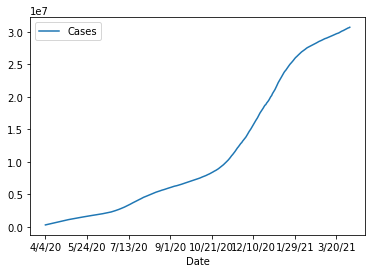

In [12]:
df.plot(x='Date',y='Cases', kind='line')
plt.show()